# Factor Analysis

In [24]:
import numpy as np
import pandas as pd
import factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [25]:
df_original = pd.read_csv("flight.csv")
df_original.dropna(inplace = True)
data = df_original.drop(columns=['Unnamed: 0'])
print(df_original.shape)
df_original.head()

(103594, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [26]:
df_original.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [27]:
cols_to_drop = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']

In [28]:
#  getting the latent variables for performing FA

df = df_original.drop(columns=cols_to_drop)
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq_value, p_value = calculate_bartlett_sphericity(df)
chi_sq_value, p_value

(599960.2330494374, 0.0)

In [30]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
kmo_all, kmo_model

(array([0.74187416, 0.75278118, 0.68164204, 0.70662706, 0.84090358,
        0.73646294, 0.83294231, 0.76788955, 0.82893205, 0.88980399,
        0.8148015 , 0.69990118, 0.7841862 , 0.81688168]),
 0.7812331875744178)

In [31]:
ncol = df.shape[1]
fa = FactorAnalyzer(n_factors=ncol, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=14, rotation='varimax', rotation_kwargs={})

In [32]:
ev, _ = fa.get_eigenvalues()
ev

array([3.80024516, 2.36183515, 2.16616162, 1.06335524, 0.95097077,
       0.70018988, 0.54019662, 0.51460152, 0.4692692 , 0.36833334,
       0.32854129, 0.29519376, 0.25312907, 0.18797739])

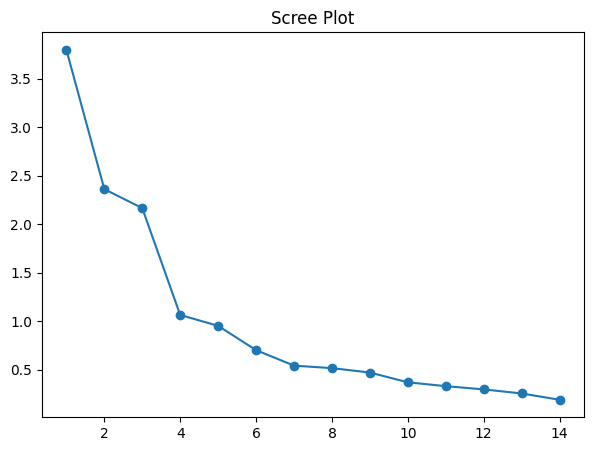

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(range(1, df.shape[1]+1),ev)
plt.plot(range(1, df.shape[1]+1),ev)
plt.title("Scree Plot")
plt.show()

In [34]:
n_factors = 5
col_names = ["F"+str(i) for i in range(1, n_factors+1)]
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df)
loadings = pd.DataFrame(fa.loadings_, columns = col_names, index = df.columns)
loadings.head().round(2)

,F1,F2,F3,F4,F5
Inflight wifi service,0.10,0.14,0.67,0.42,-0.10
Departure/Arrival time convenient,-0.01,0.05,0.09,0.67,0.13
Ease of Online booking,-0.03,0.04,0.68,0.58,-0.09
Gate location,0.00,-0.03,0.09,0.66,-0.08
Food and drink,0.76,-0.00,0.05,0.02,-0.02


In [35]:
communalities = pd.DataFrame(fa.get_communalities(), index = df.columns, columns=['Communalities'])
communalities.head().round(2)

,Communalities
Inflight wifi service,0.67
Departure/Arrival time convenient,0.48
Ease of Online booking,0.81
Gate location,0.45
Food and drink,0.58


In [36]:
var = 

SyntaxError: invalid syntax (2931401036.py, line 1)